In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
audio_path = 'Train_0_Example_1.wav'
audio_data, sample_rate = librosa.load(audio_path)
sliced =  audio_data[:22050]

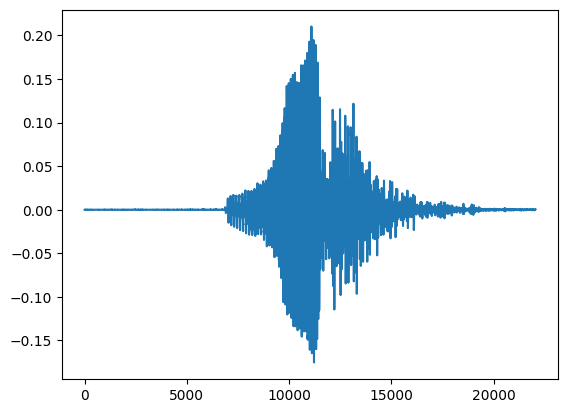

In [16]:
t = np.linspace(0, len(sliced), len(sliced))
plt.plot(t, sliced)

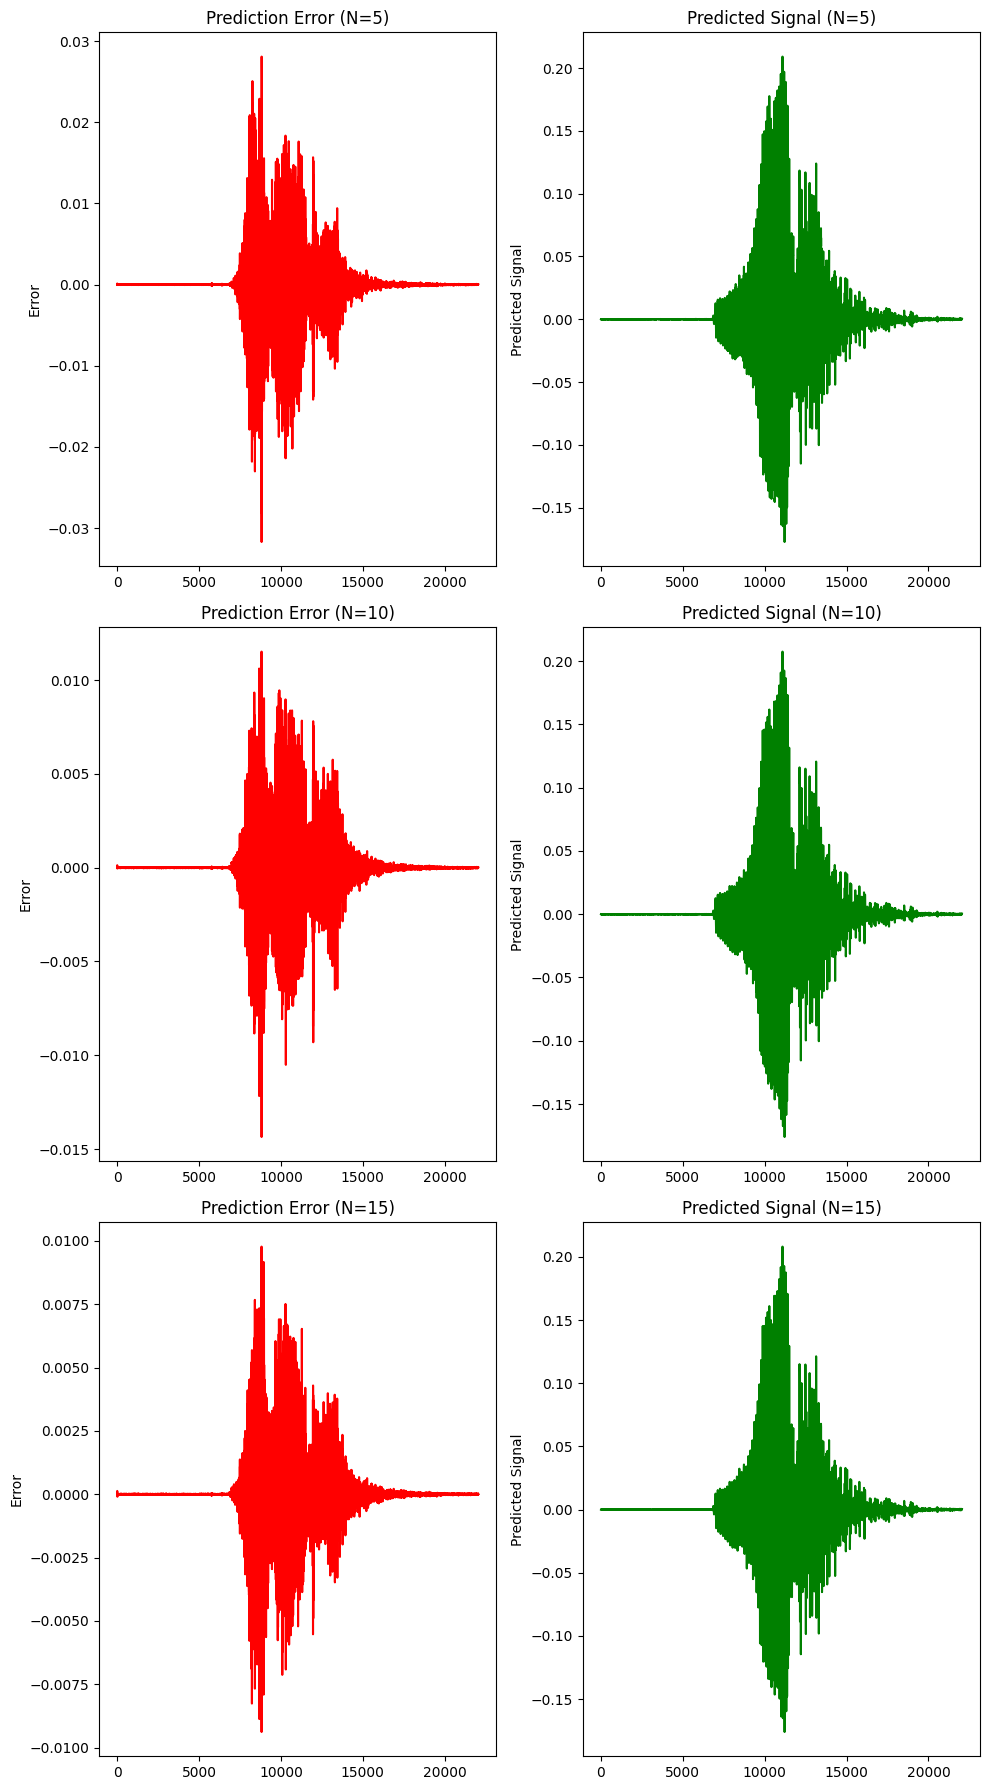

In [18]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_path = 'Train_0_Example_1.wav'
audio_data, sample_rate = librosa.load(audio_path)
sliced = audio_data[:22050]

def autocorr(x, N):
    result = np.correlate(x, x, mode='same')
    result = result[len(result) // 2:]
    auto_vec = result[1:N + 1]
    auto_corr_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            auto_corr_matrix[i, j] = result[abs(i - j)]

    return auto_corr_matrix, auto_vec

def autocorr_vec_func(x, N):
    result = np.correlate(x, x, mode='same')
    result = result[len(result) // 2:]
    auto_vec = result[1:N + 1]
    return auto_vec

def plot_error_and_prediction_for_N_values(N_values, sliced):
    plt.figure(figsize=(10, len(N_values) * 6))

    for i, N in enumerate(N_values):
        autocorr_mat, autocorr_vec = autocorr(sliced, N)
        autocorr_vec_r_1 = autocorr_vec_func(sliced, N)

        a = -np.linalg.inv(autocorr_mat) @ autocorr_vec_r_1

        x_predicted = np.zeros_like(sliced)

        for n in range(N, len(sliced)):
            x_predicted[n] = -np.sum(a * sliced[n - N:n][::-1])

        err = sliced - x_predicted

        plt.subplot(len(N_values), 2, 2 * i + 1)
        plt.plot(err, color='r')
        plt.title(f"Prediction Error (N={N})")
        plt.ylabel("Error")

        plt.subplot(len(N_values), 2, 2 * i + 2)
        plt.plot(x_predicted, color='g')
        plt.title(f"Predicted Signal (N={N})")
        plt.ylabel("Predicted Signal")

    plt.tight_layout()
    plt.show()

N_values = [5, 10, 15]
plot_error_and_prediction_for_N_values(N_values, sliced)


from the above plots we can say as the value of N increases the error decreases.